# Predict whether a mammogram mass is benign or malignant
We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)
This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


BI-RADS assessment: 1 to 5 (ordinal)
Age: patient's age in years (integer)
Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
Severity: benign=0 or malignant=1 (binominal)

BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. 

The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

We will apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). we will apply:
Decision tree
Random forest
KNN
Naive Bayes
SVM
Logistic Regression
And, as a bonus challenge, a neural network using Keras.

In [23]:
#resampling procedure used to evaluate ML models on a lmt data sample...
##k is the no of groups that given data set to be split on

import pandas as pd
masses_data= pd.read_csv("/Users/harshitadidwania/Desktop/mammogram_ML.txt", na_values=['?'],names=['BI-RADS', 'AGE', 'SHAPE','MARGIN', 'DENSITY', 'SEVERITY'])
masses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null float64
AGE         956 non-null float64
SHAPE       930 non-null float64
MARGIN      913 non-null float64
DENSITY     885 non-null float64
SEVERITY    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [12]:
masses_data.head()


,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [29]:
masses_data.dropna(inplace=True)
masses_data

,BI-RADS,AGE,SHAPE,MARGIN,DENSITY,SEVERITY
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1
11,3.0,42.0,2.0,1.0,3.0,1
13,4.0,36.0,3.0,1.0,2.0,0
14,4.0,60.0,2.0,1.0,2.0,0
15,4.0,54.0,1.0,1.0,3.0,0
16,3.0,52.0,3.0,4.0,3.0,0


In [43]:
##returns array i.e. numpy
features= masses_data[['AGE', 'SHAPE','DENSITY','MARGIN']].values
label_class = masses_data['SEVERITY'].values
feature_names= ['AGE', 'SHAPE','DENSITY','MARGIN']
print(features)

[[67.  3.  3.  5.]
 [58.  4.  3.  5.]
 [28.  1.  3.  1.]
 ...
 [64.  4.  3.  5.]
 [66.  4.  3.  5.]
 [62.  3.  3.  3.]]


In [33]:
#Some of our models require the input data to be normalized, so go ahead and normalize the attribute data.
#Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn;
#they might behave badly if the individual features do not more or less look like standard normally distributed data: 
#Gaussian with zero mean and unit variance



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)
all_features_scaled = scaler.transform(features)
all_features_scaled

array([[ 0.7650629 ,  0.17563638,  0.24046607,  1.39618483],
       [ 0.15127063,  0.98104077,  0.24046607,  1.39618483],
       [-1.89470363, -1.43517241,  0.24046607, -1.157718  ],
       ...,
       [ 0.56046548,  0.98104077,  0.24046607,  1.39618483],
       [ 0.69686376,  0.98104077,  0.24046607,  1.39618483],
       [ 0.42406719,  0.17563638,  0.24046607,  0.11923341]])

# SPLITTING INTO TEST DATA AND TRAIN DATA
#results are same if you use random state in sklearn in every time you run the output



In [86]:
import numpy as np
from sklearn.model_selection import train_test_split
numpy.random.seed(1234)
X_train,X_test,Y_train,Y_test=train_test_split(all_features_scaled,label_class,random_state=1)

# DECISION TREES

In [60]:
from sklearn.tree import DecisionTreeClassifier
#clf is classifier
clf=DecisionTreeClassifier(random_state=1)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

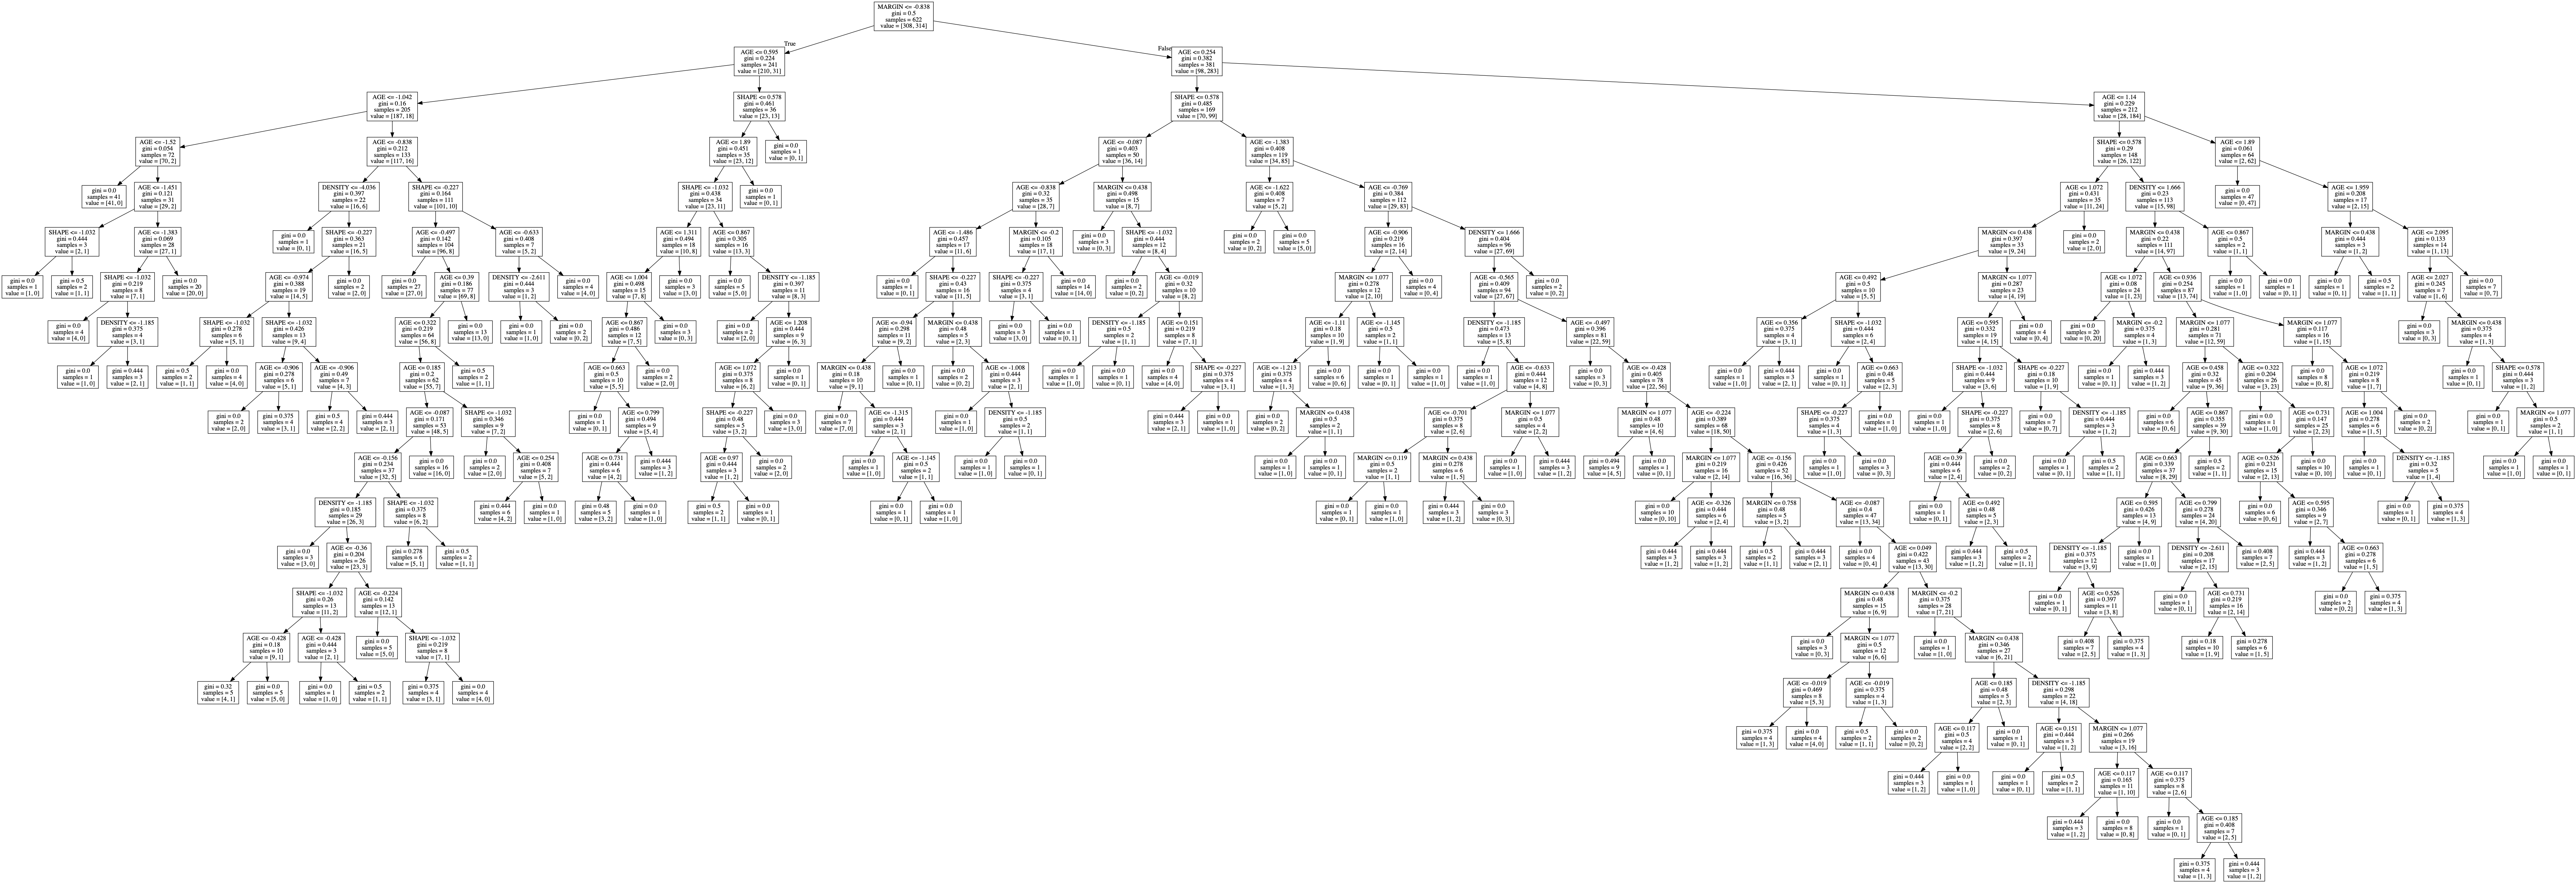

In [46]:
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 
dot_data= StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=feature_names)
graph=graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [47]:
clf.score(X_test, Y_test)

0.7355769230769231

In [56]:
#K-FOLD CROSS VALIDATION


from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, label_class, cv=10)
clf.fit(X_train,Y_train)
cv_scores.mean()

0.7373556945552244

In [78]:
clf.predict([[0.99,0.77, 0.2,3]])

array([1])

# svm-support vector machine


In [122]:
from sklearn.svm import SVC
svc= SVC(kernel='linear')
svc.fit(X_train, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
y_pred=svc.predict([[ 0.7650629 ,  0.17563638,  0.24046607,  1.39618483]])
y_pred

array([1])

In [116]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
########print(classification_report(Y_test, y_pred))#####error

In [106]:
all_features_scaled.shape


(830, 4)

In [105]:
label_class.shape

(830,)

In [143]:
cv_scores=cross_val_score(svc,all_features_scaled,label_class, cv=10)
cv_scores.mean()

0.7964988875362076

# KNN


In [128]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [130]:
y_pred=knn.predict_proba(X_test)
y_pred


array([[1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4,

In [142]:
cv_scores=cross_val_score(knn,all_features_scaled,label_class, cv=10)
cv_scores.mean()

0.7735464506108056

# NaiveBayes

In [145]:
##multinomialnb
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, label_class, cv=10)

cv_scores.mean()

0.7844055665169388

# LogisticRegression


In [147]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, label_class, cv=10)
cv_scores.mean()

0.8073583532737221